In [16]:
import pandas as pd


pd.set_option("display.max_rows", 10)


%matplotlib inline


VOZNIKI = pd.read_csv("F1_podatki/F1_drivers.csv", index_col="ime")
VOZNIKI_DODATNO = pd.read_csv("F1_podatki/F1_drivers_dodatno.csv", index_col="ime")


In [17]:
VOZNIKI

,država,nastopi,zmage,druga mesta,tretja mesta,stopničke,začne s prve pozicije,najhitrejši krog,naslovi,točke,dodatni url
ime,,,,,,,,,,,
Lewis Hamilton,United Kingdom,343,103,56,39,198,104,67,7,4724,https://www.f1-fansite.com/f1-drivers/lewis-ha...
Sebastian Vettel,Germany,299,53,36,33,122,57,38,4,3098,https://www.f1-fansite.com/f1-drivers/sebastia...
Max Verstappen,Netherlands,196,61,29,16,106,40,32,3,2823,https://www.f1-fansite.com/f1-drivers/max-vers...
Fernando Alonso,Spain,388,32,40,34,106,22,26,2,2308,https://www.f1-fansite.com/f1-drivers/fernando...
Kimi Räikkönen,Finland,349,21,37,45,103,18,46,1,1873,https://www.f1-fansite.com/f1-drivers/kimi-rai...
...,...,...,...,...,...,...,...,...,...,...,...
Toranosuke Takagi,Japan,32,0,0,0,0,0,0,0,0,https://www.f1-fansite.com/f1-drivers/toranosu...
Brett Lunger,United States,34,0,0,0,0,0,0,0,0,https://www.f1-fansite.com/f1-drivers/brett-lu...
Max Chilton,United Kingdom,35,0,0,0,0,0,0,0,0,https://www.f1-fansite.com/f1-drivers/max-chil...


<Axes: xlabel='država'>

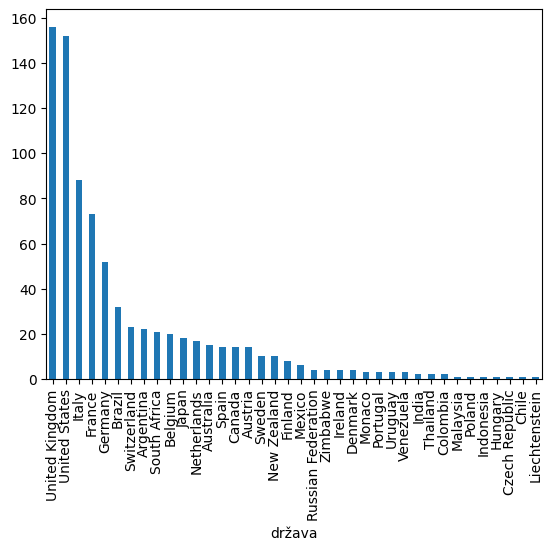

In [38]:

stevilo_voznikov_po_drzavah = VOZNIKI.groupby('država').size()
stevilo_voznikov_po_drzavah.sort_values(inplace= True,ascending=False)
stevilo_voznikov_po_drzavah.plot.bar()

<Axes: xlabel='država'>

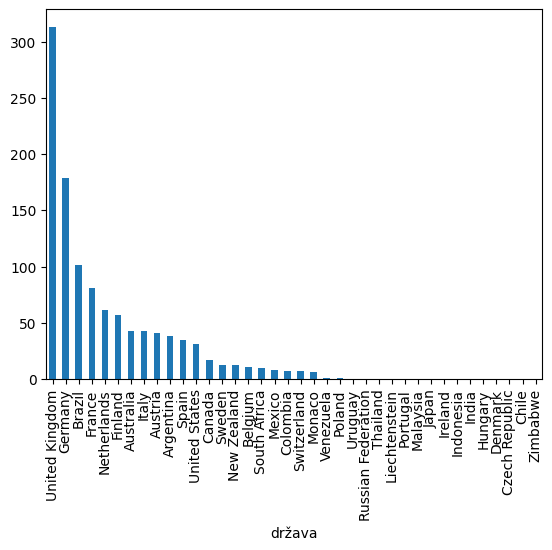

In [36]:
zmage_po_drzavah = VOZNIKI.groupby(by="država")["zmage"].sum()
zmage_po_drzavah.sort_values(inplace= True,ascending=False)
zmage_po_drzavah.plot.bar()

In [65]:
filter_brez_zmage = (VOZNIKI['zmage'] == 0) 
najvec_nastopov_brez_zmage = VOZNIKI[filter_brez_zmage].sort_values("nastopi", ascending=False)
najvec_nastopov_brez_zmage[['država', 'nastopi', 'zmage']].head(10)

,država,nastopi,zmage
ime,,,
Nico Hülkenberg,Germany,214,0
Andrea de Cesaris,Italy,208,0
Nick Heidfeld,Germany,181,0
Romain Grosjean,France,179,0
Kevin Magnussen,Denmark,173,0
Martin Brundle,United Kingdom,158,0
Lance Stroll,Canada,153,0
Derek Warwick,United Kingdom,147,0
Jean-Pierre Jarier,France,135,0


,nastopi,zmage,Dirke med zmagami
ime,,,
Lee Wallard,2,1,2.000000
Juan Manuel Fangio,51,24,2.125000
Alberto Ascari,32,13,2.461538
Bill Vukovich,5,2,2.500000
Jim Clark,72,25,2.880000
Max Verstappen,196,61,3.213115
Lewis Hamilton,343,103,3.330097
Michael Schumacher,307,91,3.373626
Jackie Stewart,100,27,3.703704


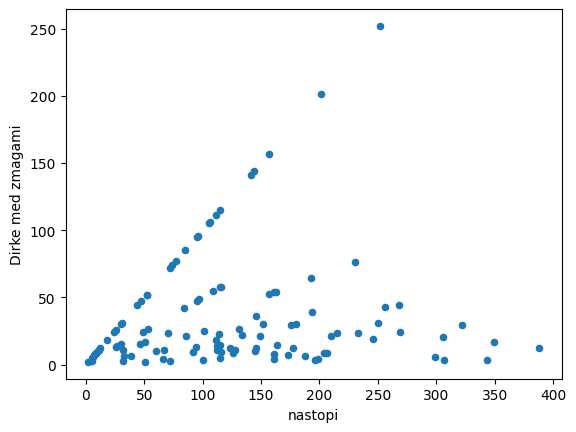

In [12]:
filter_ima_zmago = (VOZNIKI["zmage"] != 0)
ima_zmago = VOZNIKI.copy()[filter_ima_zmago]
ima_zmago["Dirke med zmagami"] = ima_zmago["nastopi"] / ima_zmago["zmage"]
ima_zmago.plot.scatter('nastopi', 'Dirke med zmagami')
ima_zmago.sort_values("Dirke med zmagami")[['nastopi', 'zmage', 'Dirke med zmagami']].head(10)

,nastopi,točke,povp. točke na dirko
ime,,,
Max Verstappen,196,2823,14.403061
Lewis Hamilton,343,4724,13.772595
Sebastian Vettel,299,3098,10.361204
Charles Leclerc,134,1220,9.104478
Nico Rosberg,206,1594,7.737864
Valtteri Bottas,233,1797,7.712446
Lando Norris,115,789,6.860870
Oscar Piastri,33,209,6.333333
George Amick,1,6,6.000000


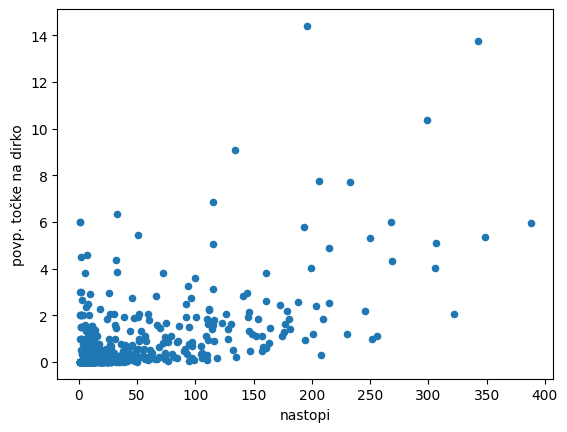

In [43]:
VOZNIKI_DODATNO["točke"] = VOZNIKI["točke"]
VOZNIKI['povp. točke na dirko'] = VOZNIKI['točke'] / VOZNIKI['nastopi']
VOZNIKI_DODATNO["povp. točke na dirko"] = VOZNIKI["povp. točke na dirko"].apply(round)
VOZNIKI.plot.scatter('nastopi', 'povp. točke na dirko')
VOZNIKI.sort_values("povp. točke na dirko", ascending=False)[['nastopi', 'točke', 'povp. točke na dirko']].head(10)

In [33]:
VOZNIKI_DODATNO

,višina (m),starost,povp. štartno mesto,povp. končno mesto,prevoženi krogi,točke,povp. točke na dirko
ime,,,,,,,
Lewis Hamilton,1.74,39,4.2,3.6,19.586,4724,14
Sebastian Vettel,1.75,37,6.3,5.3,16.427,3098,10
Max Verstappen,1.80,26,5.2,3.6,10.553,2823,14
Fernando Alonso,1.71,42,8.6,6.3,21.118,2308,6
Kimi Räikkönen,1.75,44,7.7,6.2,18.620,1873,5
...,...,...,...,...,...,...,...
Rubens Barrichello,1.72,52,8.9,7.1,16.642,658,2
Ayrton Senna,1.75,34,3.1,3.1,8.236,614,4
George Russell,1.88,26,11.0,9.9,6.404,580,5


<Axes: xlabel='višina (m)'>

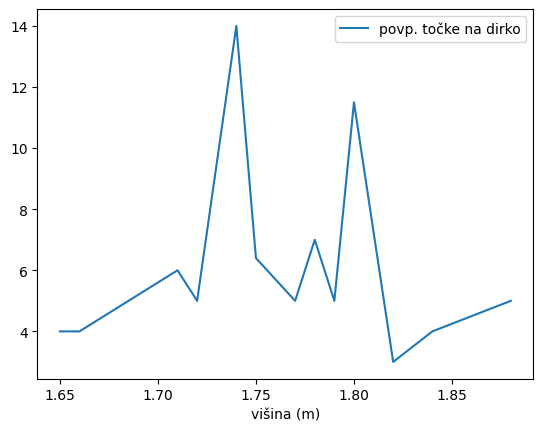

In [34]:
podtabela1  = VOZNIKI_DODATNO[["višina (m)", "povp. točke na dirko"]].copy()
podtabela1.groupby(by="višina (m)").agg({"povp. točke na dirko":"mean"}).plot()

<Axes: xlabel='povp. štartno mesto'>

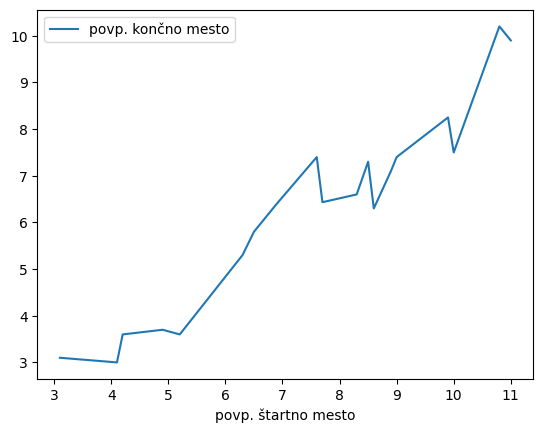

In [37]:
podtabela2 = VOZNIKI_DODATNO[["povp. štartno mesto", "povp. končno mesto"]].copy()
podtabela2.groupby(by="povp. štartno mesto").agg({"povp. končno mesto":"mean"}).plot()

<Axes: >

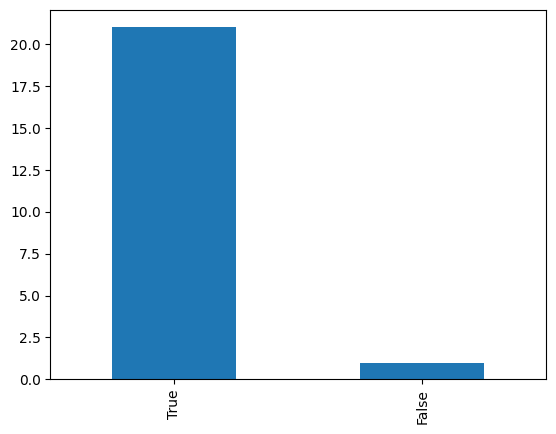

In [42]:
filter_pridobil = VOZNIKI_DODATNO["povp. štartno mesto"] > VOZNIKI_DODATNO["povp. končno mesto"]
pridobil = VOZNIKI_DODATNO.groupby(filter_pridobil).size()
pridobil.sort_values(inplace= True,ascending=False)
pridobil.plot.bar()